This notebook is an adaptation of [2] and provides a starting point for training fully connected NNs.

It shows how to use a dataset from tensorflow and display images from the training and test sets.

Builds a fully connected network and shows results and after training



### Refs 

[1] https://www.tensorflow.org/install

[2] https://www.tensorflow.org/tutorials/keras/classification
    

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Auxiliary functions to show plots of training history and display images

In [3]:
def show_history(history):
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()


def show_images(rows, cols, images, labels):

    width= 2 * rows
    height= 2 * cols

    f, axes= plt.subplots(rows,cols,figsize=(height,width))
    fig=plt.figure()

    for a in range(rows*cols):
        subplot_title=("class "+str(labels[a]))
        axes.ravel()[a].set_title(subplot_title)  
        axes.ravel()[a].imshow(images[a, :, :], cmap=plt.cm.binary)
        axes.ravel()[a].axis('off')
    fig.tight_layout()    
    plt.show() 
    
    
    
def show_image(number):
    plt.figure()
    plt.imshow(x_train[0], cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [4]:

class_names = np.array(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

def plot_predictions(predictions, ground_truth, num_rows= 5, num_cols=3 ):

    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i], ground_truth, x_test)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i], ground_truth)
    plt.tight_layout()
    plt.show()
    
    
def show_misclassified(predictions, ground_truth, num_rows= 5, num_cols=3):
    
    # Plot the first X test images with wrong predictions.
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    i = 0
    k = 0
    while i < num_images:
        predicted_label = np.argmax(predictions[k])
        if predicted_label != y_test[k]:
            plt.subplot(num_rows, 2*num_cols, 2*i+1)
            plot_image(k, predictions[k], ground_truth, x_test)
            plt.subplot(num_rows, 2*num_cols, 2*i+2)
            plot_value_array(k, predictions[k], ground_truth)
            i += 1
        k += 1
    plt.tight_layout()
    plt.show()
    

## Load the dataset from tensorflow collection of datasets 

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


## Display a few images

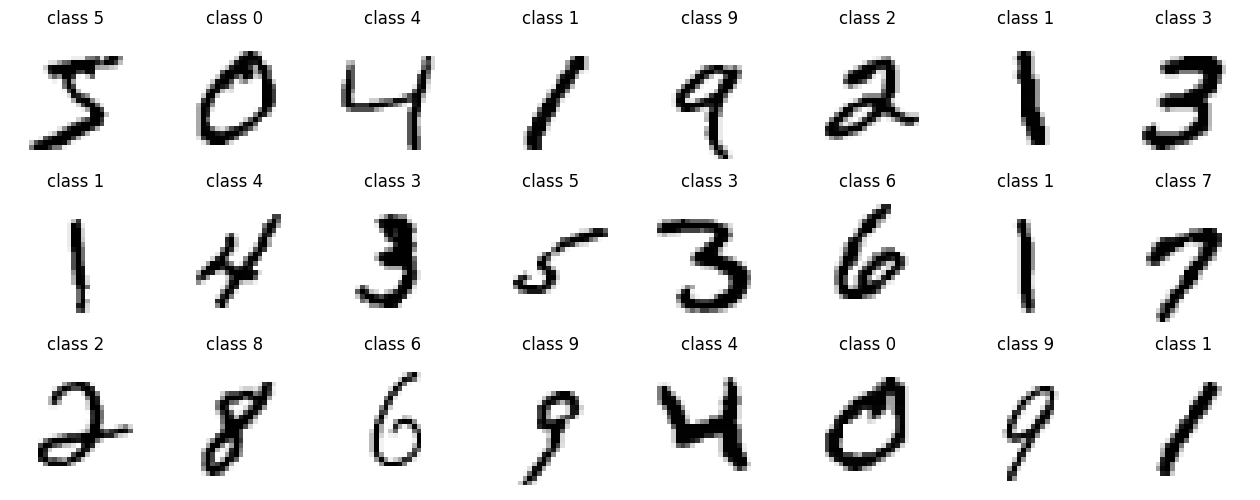

<Figure size 640x480 with 0 Axes>

In [6]:
show_images(3,8,x_train, y_train) 

# Data distribution per class

As can be seen from the result of the code below, the data is fairly distributed amongst the classes

In [7]:
from collections import Counter
dist_test, dist_train = Counter(y_test), Counter(y_train)
print(dist_test)
print(dist_train)

Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})
Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


## Normalize the Input Data

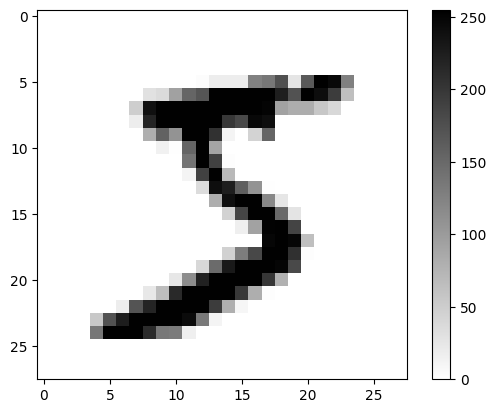

In [8]:
show_image(0)

In [9]:
x_train, x_test = x_train / 255.0, x_test / 255.0

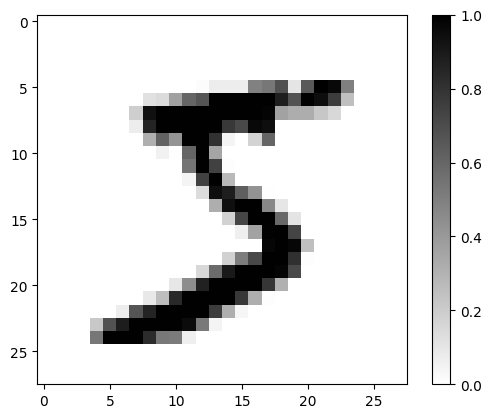

In [10]:
show_image(0)

# Create model

Single hidden layer with 64 units

In [11]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten(name='image_flatten'))
model.add(tf.keras.layers.Dense(64, activation='relu', name='hidden_layer'))
model.add(tf.keras.layers.Dense(10, activation='softmax', name='output_layer'))



Note: The activation name 'relu' corresponds to calling tf.keras.activations.relu

The string can be used as a shortcut. Tensorflow will call the function whose name matches the string



In [12]:
#see answer by Hirak Sarkar in https://stackoverflow.com/questions/56799561/how-can-i-find-the-list-of-available-string-abbreviations-for-keras-classes-used

for k, v in tf.keras.activations.__dict__.items():
    if not k[0].isupper() and not k[0] == "_":
        print(k)

deserialize
elu
exponential
gelu
get
hard_sigmoid
linear
relu
selu
serialize
sigmoid
softmax
softplus
softsign
swish
tanh


## Display model information

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_flatten (Flatten)     (None, 784)               0         
                                                                 
 hidden_layer (Dense)        (None, 64)                50240     
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None


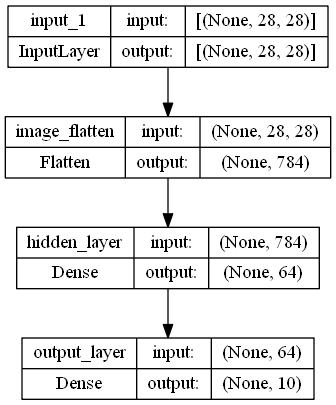

In [13]:
print(model.summary())
tf.keras.utils.plot_model(model, show_shapes=True)

## Some predictions with an untrained model

In [14]:
predictions = model.predict(x_test)

print(predictions[0])



313/313 [==============================] - 7s 867us/step
[0.13130662 0.11939986 0.11380886 0.0690238  0.04931562 0.1211116
 0.07107838 0.09639496 0.10998709 0.11857326]


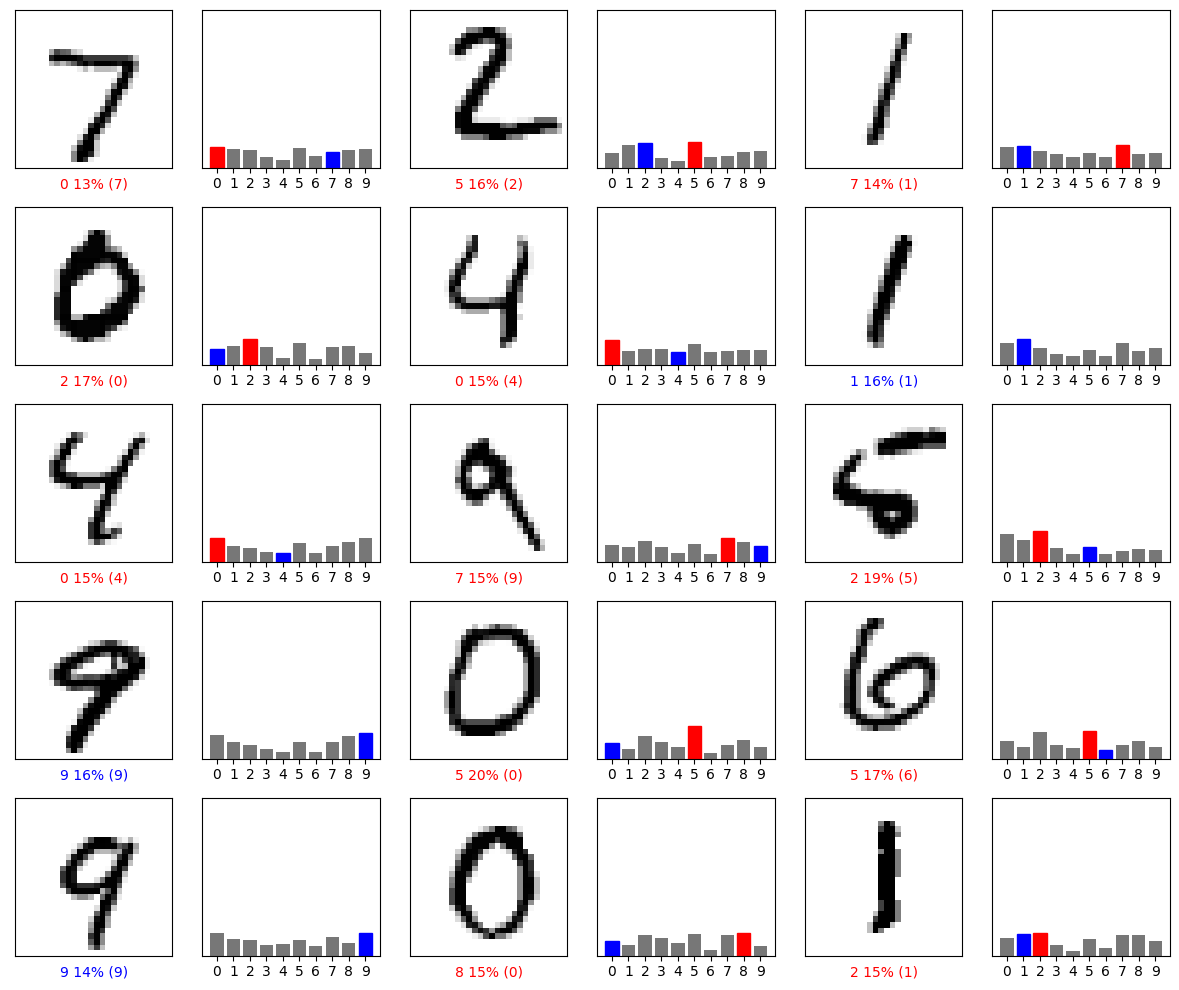

In [15]:
plot_predictions(predictions, y_test, 5, 3)

# Train the model with a custom loop

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=60000).batch(32)

@tf.function
def train_step(x,y):
    with tf.GradientTape() as tape:

        output = model(x)
        loss = loss_fn(y, output)
        
    grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
   
    return loss

def train(epochs):
    for epoch in range(epochs):
        loss = 0
        epoch_loss = 0
        for (x_batch, y_batch) in train_dataset:

            epoch_loss += train_step(x_batch, y_batch)

        print('Epoch :', epoch, " Loss:", epoch_loss.numpy() )

train(5)
                

Epoch : 0  Loss: 566.4713
Epoch : 1  Loss: 272.15195
Epoch : 2  Loss: 201.04263
Epoch : 3  Loss: 157.88011
Epoch : 4  Loss: 129.03146


# Train using Tensorflow fit function

## Specify the optimizer, loss and metrics

optimizer: gradient descent optimization algorithm

loss: the loss function upon which derivatives are computed

metrics: metrics to be computed during training and evaluation

In [18]:
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

eval = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 5s - loss: 0.0883 - accuracy: 0.9728 - 5s/epoch - 15ms/step


## Training 

In [19]:
history = model.fit(x_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 7s 2ms/step - loss: 0.0569 - accuracy: 0.9827
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0487 - accuracy: 0.9853
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0427 - accuracy: 0.9868
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0350 - accuracy: 0.9892
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0310 - accuracy: 0.9904
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0278 - accuracy: 0.9915
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0241 - accuracy: 0.9926
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0212 - accuracy: 0.9933
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0185 - accuracy: 0.9942
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

## History graphs for accuracy and loss


dict_keys(['loss', 'accuracy'])


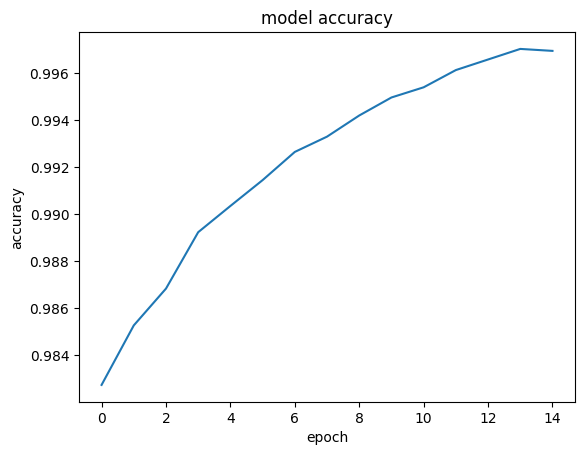

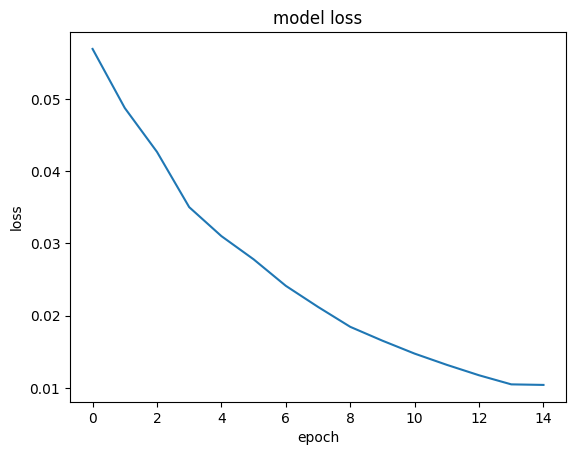

{'loss': [0.05691811814904213, 0.04874124750494957, 0.04266725108027458, 0.03502041846513748, 0.031010642647743225, 0.02779936045408249, 0.024129871279001236, 0.02121196687221527, 0.01845669187605381, 0.01653680019080639, 0.014746733009815216, 0.013191883452236652, 0.011750071309506893, 0.010493154637515545, 0.010415853001177311], 'accuracy': [0.9827333092689514, 0.9852666854858398, 0.9868333339691162, 0.9892333149909973, 0.9903500080108643, 0.9914500117301941, 0.9926499724388123, 0.9933000206947327, 0.9941999912261963, 0.9949666857719421, 0.9954000115394592, 0.9961333274841309, 0.9965833425521851, 0.9970333576202393, 0.9969499707221985]}


In [20]:
show_history(history)

print(history.history)


# Evaluate the model on the test set

In [21]:
eval1 = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 3s - loss: 0.0963 - accuracy: 0.9767 - 3s/epoch - 10ms/step


313/313 [==============================] - 3s 1ms/step


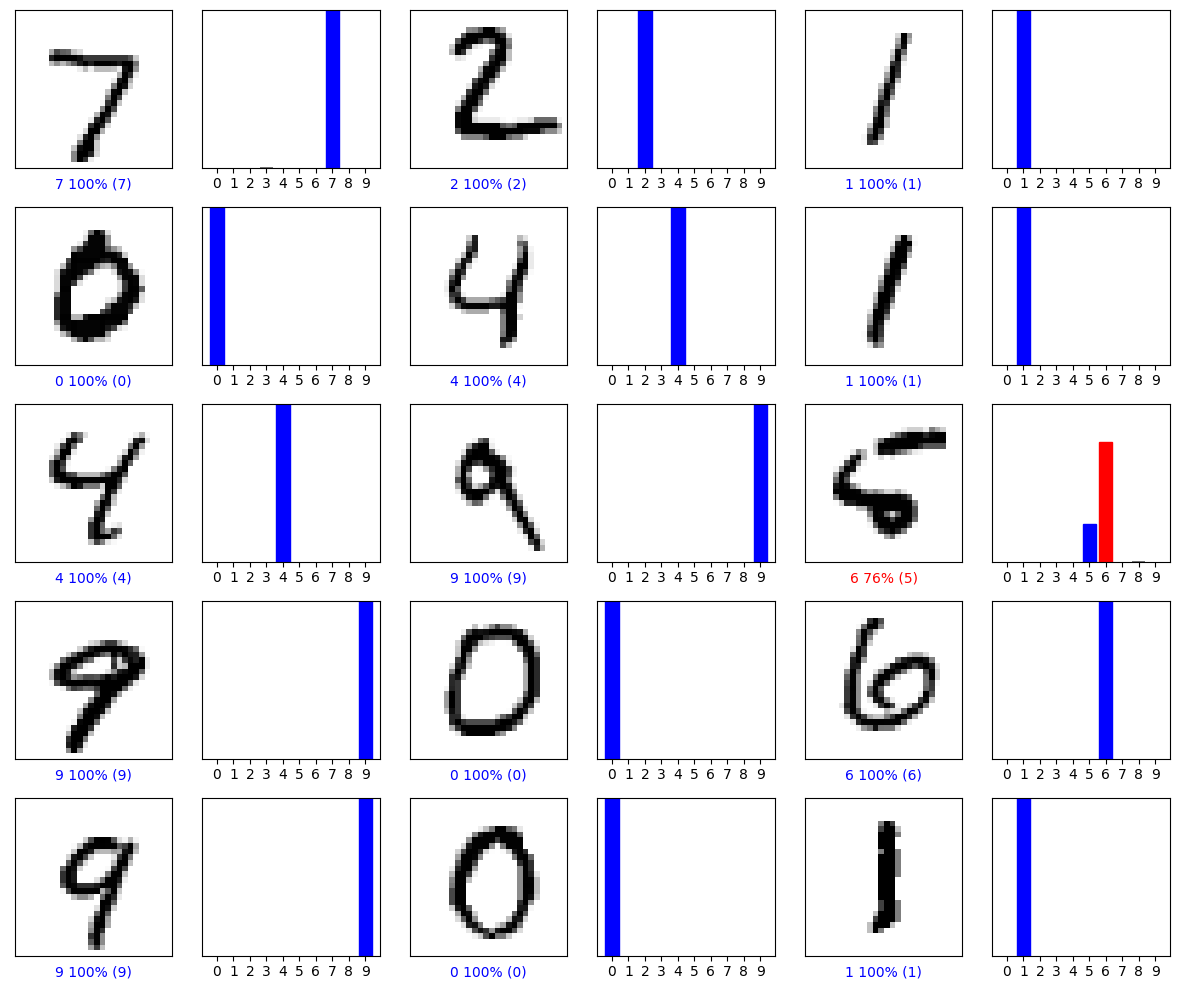

In [22]:
predictions = model.predict(x_test)
plot_predictions(predictions, y_test, 5, 3)

## Some misclassified samples

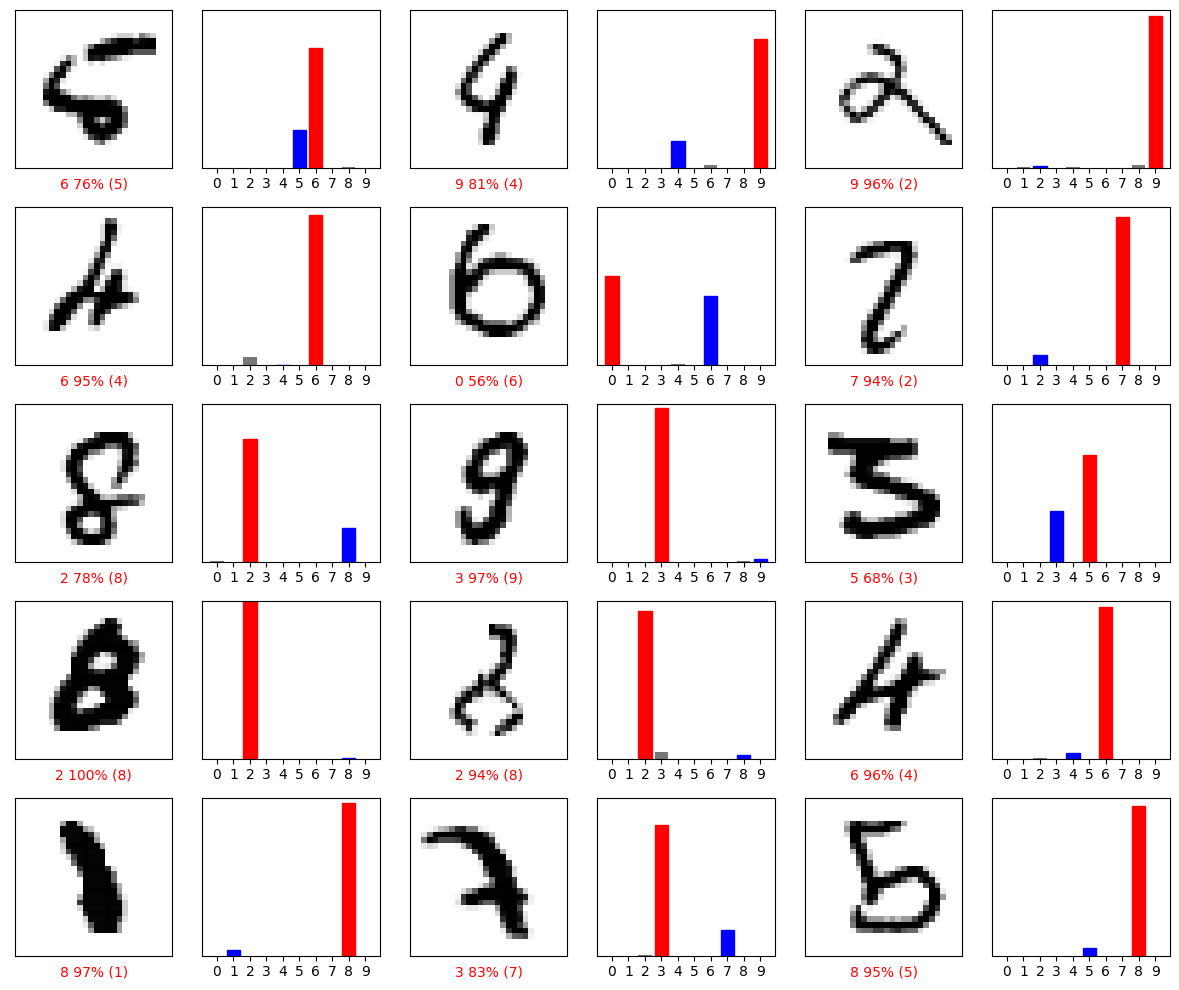

In [23]:
show_misclassified(predictions, y_test, 5, 3)

In [24]:
preds_sparse = [np.argmax(x) for x in predictions]

# Confusion Matrix

rows are labels, columns are predictions

In [25]:
conf_mat = tf.math.confusion_matrix(y_test, preds_sparse)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    1,    1,    1,    0,    3,    0,    2,    0],
       [   0, 1125,    3,    0,    0,    1,    2,    0,    4,    0],
       [   3,    2, 1013,    3,    1,    0,    1,    3,    5,    1],
       [   0,    1,    5,  987,    0,    7,    0,    3,    3,    4],
       [   1,    0,    4,    0,  951,    0,    7,    3,    2,   14],
       [   2,    0,    1,    9,    1,  867,    6,    0,    5,    1],
       [   6,    3,    2,    1,    3,    6,  937,    0,    0,    0],
       [   2,    5,    9,    3,    1,    0,    0, 1001,    0,    7],
       [   4,    0,    7,    7,    1,    7,    1,    3,  940,    4],
       [   3,    2,    0,    5,    6,    6,    1,    7,    4,  975]])>

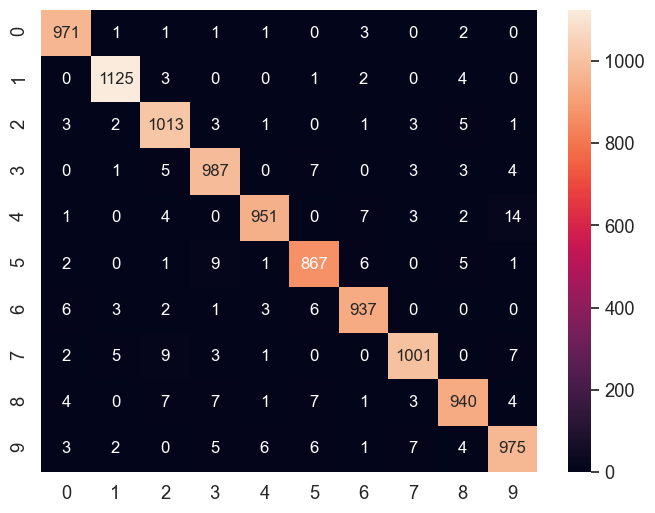

In [26]:
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(conf_mat.numpy(), range(10), range(10))
plt.figure(figsize=(8,6))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='d') # font size

plt.show()